# The impact of replacing the number $e$ in Logistic Regression.

## Importing the dataset, libraries and feature scaling

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
df = load_breast_cancer(as_frame=True)
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## Logistic Regression using Stochastic Gradient Descent

In [5]:
sgd = SGDClassifier(loss = 'log', max_iter = 2000, learning_rate = 'constant', eta0 = 0.001, alpha = 0) .fit(X_train, y_train)
sgd.score(X_test,y_test)

0.9649122807017544

## Visual representation of sigmoid function of replacing $e$ with other constants

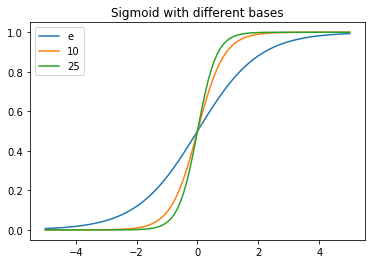

In [6]:
x = np.linspace(-5,5, 100)
def sig(x):
    return 1/(1+np.exp(-x))
def sig2(x):
    return 1/(1+10**(-x))
def sig3(x):
    return 1/(1+25**(-x))
plt.plot(x,sig(x), label = 'e')
plt.plot(x,sig2(x),  label = '10')
plt.plot(x,sig3(x),  label = '25')
plt.legend()
plt.title('Sigmoid with different bases')
plt.show()

## Mannual coding of Logistic Regression using Stochastic Gradient Descent

In [7]:
def sigmoid(w,x, base):                  # Sigmoid function
    return 1 / (1 + base**(-x.dot(w)))     
def gradient_error(w, n, base):            # Gradient of the error function
    return - (y_train.iloc[n] - sigmoid(w,X_train.iloc[n], base))*X_train.iloc[n]
base = np.e 
T = 2000  # number of iterations
nu = 0.001   # learning rate
w = np.zeros(30)  # initial weights 
N = len(X_train)     # number of datapoints in training set
for t in range(1,T+1):  
    np.random.seed(t)     # make random choice of points in SGD 'less' random for training purposes
    n = np.random.randint(1,N)     # generate a random datapoint
    w = w - nu * gradient_error(w,n, base)       # update rule
predict = pd.DataFrame(sigmoid( w, X_test, base))       # convert scores into probabilites
predict[predict[0] < 0.5] = 0             # Set a classification threshold to 0.5
predict[predict[0] >= 0.5] = 1
accuracy_score(y_test, predict.astype('int32'))          # Calculate the accuracy score for test dataset.


0.9473684210526315

## Performing the same algorithm using other numbers instead of $e$

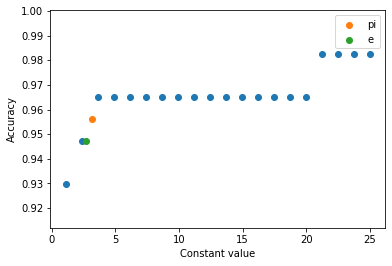

In [8]:
def sigmoid(w,x, base):                  # Sigmoid function
    return 1 / (1 + base**(-x.dot(w)))     
def gradient_error(w,n, base):            # Gradient of the error function
    return - np.log(base) * (y_train.iloc[n] - sigmoid(w,X_train.iloc[n], base))*X_train.iloc[n]

def call(base):    # making a function to call multiple times depending on the base e.g 1.25, e, pi, 10...
    T = 2000  
    nu = 0.001  
    w = np.zeros(30) 
    N = len(X_train)  
    for t in range(1,T+1):  
        np.random.seed(t)
        n = np.random.randint(1,N)
        w = w - nu * gradient_error(w,n, base)
    predict = pd.DataFrame(sigmoid( w, X_test, base))
    predict[predict[0] < 0.5] = 0
    predict[predict[0] >= 0.5] = 1
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_test, predict.astype('int32'))  

val = []      # List to store accuracies for different basis
bslist = np.linspace(1.1,25, 20)
for bs in bslist:
    val.append(call(bs)) 
    
plt.scatter(bslist, val)               # Plot accuracy versus base
plt.scatter(np.pi, call(np.pi), label = 'pi')    # plot for pi
plt.scatter(np.e, call(np.e), label = 'e')     # plot traditional e
plt.xlabel('Constant value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
bslist = [1, np.e, np.pi, 10, 100, 100]
print('Base    Accuracy')
for bs in bslist:
    print(round(bs, 4),': ', round(call(bs), 4), ' \n')

Base    Accuracy
1 :  0.6316  

2.7183 :  0.9474  

3.1416 :  0.9561  

10 :  0.9649  

100 :  0.9825  

100 :  0.9825  



## Replicating the accuracy for $e$ using base 10

In [10]:
def sigmoid(w,x, base):
    return 1 / (1 + base**(-x.dot(w)))
def gradient_error(w,n, base):            # Gradient of the error function
    return -np.log(base)*(y_train.iloc[n] - sigmoid(w,(X_train/np.log(10)).iloc[n], base))*(X_train/np.log(10)).iloc[n]
                                                  ### Rescaling data by reciprocal of ln(10)
base = 10
T = 2000  
nu = 0.001  
w = np.zeros(30) 
N = len(X_train)  
for t in range(1,T+1):  
    np.random.seed(t)
    n = np.random.randint(1,N)
    w = w - nu * gradient_error(w,n, base)
predict = pd.DataFrame(sigmoid( w, X_test, base))
predict[predict[0] < 0.5] = 0
predict[predict[0] >= 0.5] = 1
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict.astype('int32'))


0.9473684210526315